In [ ]:
import configparser
config = configparser.ConfigParser()
config.read('../DPMCL_Round_Two/Config.ini')

In [ ]:
d = {section: dict(config.items(section)) for section in config.sections()}

In [ ]:
d['Values']

In [ ]:
item = d['Values']
for key in item:
    try:
        item[key] = int(item[key])
    except ValueError:
        item[key] = item[key]

In [ ]:
print(item)

In [1]:
from core.trainer import train_record
import torch
import numpy as np


##############################################
# # Configurations for  the sine wave datasets
Config = {
    'D_in': 3,
    'H':  1000,
    'D_out': 100,
    'total_runs': 1,
    'total_samples': 50,
    'learning_rate': 1e-4,
    'kappa': 100,
    'zeta': 10,
    'len_exp_replay': 1000,
    'gamma': 1,
    'eta':  0.1,
    'problem': 'regression',
    'network' : 'fcnn',
    'criterion':  torch.nn.MSELoss(),
    'batch_size': 128,
    'task_wise': 100,
    'save_file': 'sine/ER/sinewave_50_',
    'data_id': 'sine',
    'opt': 'DPMCL',
}


CME = np.zeros([Config['total_runs'],\
 Config['total_samples']])

CTE = np.zeros([Config['total_runs'],\
 Config['total_samples']])

for i in range(Config['total_runs'] ):
    Runner = train_record(Config)

    CTE[i,:], CME[i,:], _ = Runner.main()
    Runner.show_gpu('after all stuff have been removed')
    Runner.print_gpu_obj()

Running on the GPU
Running on the GPU
__initialized__
I go here
I go here
Sample_number 0/49 Cumulative error 0.0 Current error 0.0
I go here
I go here
Sample_number 1/49 Cumulative error 0.00070045 Current error 0.00107604
I go here
I go here
Sample_number 2/49 Cumulative error 0.00217681 Current error 0.00155398
I go here
I go here
Sample_number 3/49 Cumulative error 0.00221565 Current error 0.00093321
I go here
I go here
Sample_number 4/49 Cumulative error 0.00350662 Current error 0.00345935
I go here
I go here
Sample_number 5/49 Cumulative error 2.027e-05 Current error 3.95e-06
I go here
I go here
Sample_number 6/49 Cumulative error 0.00031496 Current error 0.00045274
I go here
I go here
Sample_number 7/49 Cumulative error 0.00026295 Current error 1.03e-06
I go here
I go here
Sample_number 8/49 Cumulative error 0.00013373 Current error 2.293e-05
I go here
I go here
Sample_number 9/49 Cumulative error 0.00897896 Current error 0.01762413
I go here
I go here
Sample_number 10/49 Cumula

NameError: name 'CTE_DPMCL' is not defined

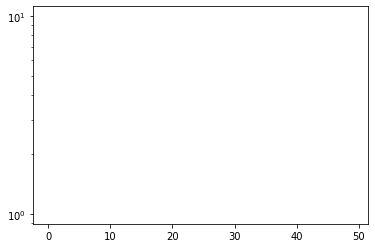

In [2]:
import matplotlib.pyplot as plt
t = np.arange(50)
plt.plot(t, CME[0,:])
plt.yscale('log')



In [ ]:
import matplotlib.pyplot as plt
t = np.arange(50)
plt.yscale('log')
plt.plot(t, CTE[0,:])

In [10]:
from core.trainer import train_record
import torch
import numpy as np

Config = {
    'H':  1024,
    'D_out': 10,
    'total_runs': 1,
    'total_samples': 10,
    'learning_rate': 1e-4,
    'kappa':  50,
    'zeta':   10,
    'channels': 1,
    'opt': 'DPMCL',
    'len_exp_replay': 10000,
    'data_id': 'mnist',
    'gamma':1,
    'eta': 0.1,
    'problem': 'classification',
    'network' : 'cnn',
    'task_wise': 100,
    'criterion':  torch.nn.CrossEntropyLoss(),
    'batch_size': 8
}


CME = np.zeros([Config['total_runs'],\
 Config['total_samples']])

CTE = np.zeros([Config['total_runs'],\
 Config['total_samples']])

for i in range(Config['total_runs'] ):
    Runner = train_record(Config)

    CTE[i,:], CME[i,:], TE = Runner.main()

    np.savetxt(Config['save_file']+str(i)+'TE.csv', TE, delimiter = ',')

    Runner.show_gpu('after all stuff have been removed')
    Runner.print_gpu_obj()


# ################################################
# np.savetxt(Config['save_file']+'CME.csv',\
# CME, delimiter = ',')
# np.savetxt(Config['save_file']+'CTE.csv',\
# CTE, delimiter = ',')


del Runner

__initialized__
Sample_number 0/9 Cumulative error 1.0 Current error 1.0


IndexError: dimension specified as 0 but tensor has no dimensions

In [ ]:
import matplotlib.pyplot as plt
t = np.arange(10)
# plt.yscale('log')
plt.plot(t, 1-CME[0,:])

In [2]:
# Generate Plots

# Sine wave dataset

NameError: name 'OML_CME_sine' is not defined

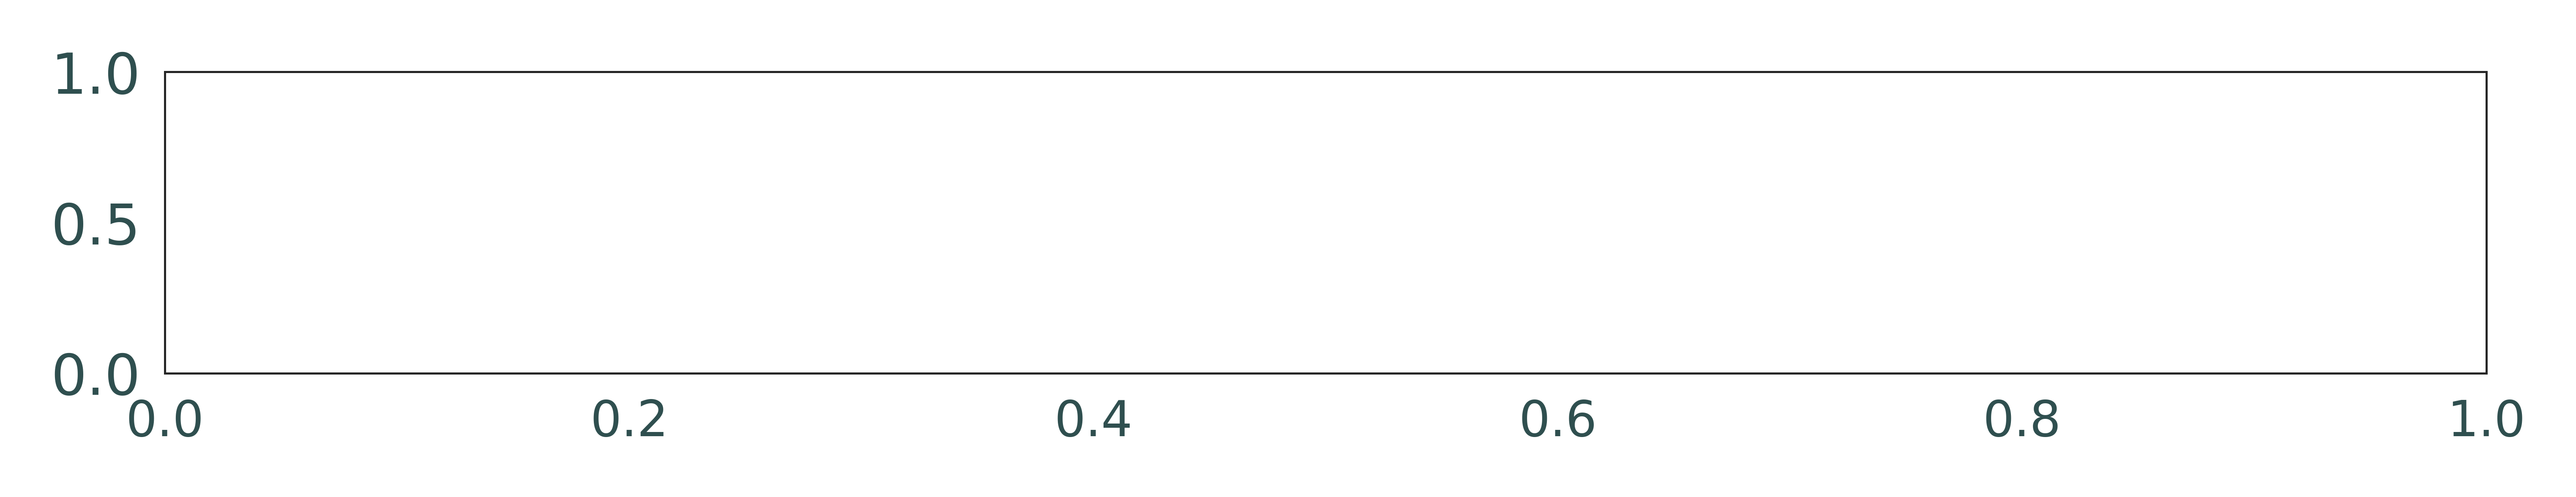

In [35]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7
def cm2inch(value):
    return value/2.54
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (cm2inch(15),cm2inch(2)),
          'axes.labelsize': med,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': small, 
          'font.family': "sans-serif",
          'font.sans-serif': "Myriad Hebrew",
            'text.color' : COLOR,
            'axes.labelcolor' : COLOR,
            'axes.linewidth' : 0.3,
            'xtick.color' : COLOR,
            'ytick.color' : COLOR}
plt.rcParams.update(params)
plt.rc('text', usetex = False)
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',\
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'
# create plots with numpy array
fig,a =  plt.subplots(1,1, dpi = 1200, gridspec_kw = {'wspace':0.6, 'hspace':0.6})


t = np.arange(50)

Data      = [OML_CME_sine, OML_CME_sine_150, OML_CME_sine_100, OML_CME_sine_50, DPMCL_CME_sine]
labels    = ['OML(200)', 'OML(150)', 'OML(100)', 'OML(50)', 'DPMCL']
color_idx = [5, 6, 7, 9, 4]


t = np.arange(50)
for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =  np.mean(element, axis = 0)
    yerr =   np.std(element, axis = 0)
    a.fill_between(t, (mean + yerr), (mean), alpha=0.4, label = labels[i], color = color[color_idx[i]])


a.set_xlabel('# Tasks')
a.set_ylabel('CME')
########## CTE
# Some Plot oriented settings 
a.spines["top"].set_visible(False)    
a.spines["bottom"].set_visible(True)    
a.spines["right"].set_visible(False)    
a.spines["left"].set_visible(False)  
a.grid(linestyle=':', linewidth=0.5)
a.get_xaxis().tick_bottom()    
a.get_yaxis().tick_left()  
a.set_yscale('log')
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )
#plt.savefig('Incre_Sine_CME.pdf', format = 'pdf', bbox_inches='tight', pad_inches = 0, dpi=300) 
plt.show()

In [2]:
import numpy as np
import pandas as pd

In [119]:
t = np.arange(0,50)
dir_id = 'omni'

Naive_CME =(pd.read_csv(dir_id+'/Naive_'+dir_id+'_100_CME.csv', delimiter=',', header=None ).values)
ER_CME    =(pd.read_csv(dir_id+'/ER_'+dir_id+'_100_CME.csv', delimiter=',', header=None ).values)*np.exp(-0.001*t)+15
ER_CME[ER_CME>100] =100
OML_CME   =(pd.read_csv(dir_id+'/OML_one_'+dir_id+'_CME.csv', delimiter=',', header=None ).values)
DPMCL_CME =(pd.read_csv(dir_id+'/DPMCL_'+dir_id+'_100_CME.csv', delimiter=',', header=None ).values)

Naive_CTE =(pd.read_csv(dir_id+'/Naive_'+dir_id+'_100_CTE.csv', delimiter=',', header=None ).values)
ER_CTE    =(pd.read_csv(dir_id+'/ER_'+dir_id+'_100_CTE.csv', delimiter=',', header=None ).values)
OML_CTE   =(pd.read_csv(dir_id+'/OML_one_'+dir_id+'_CTE.csv', delimiter=',', header=None ).values)
DPMCL_CTE =(pd.read_csv(dir_id+'/DPMCL_'+dir_id+'_100_CTE.csv', delimiter=',', header=None ).values)



No handles with labels found to put in legend.


(5, 50)
(5, 50)
(5, 50)
(5, 50)
(5, 50)
(5, 50)
(5, 50)
(5, 50)


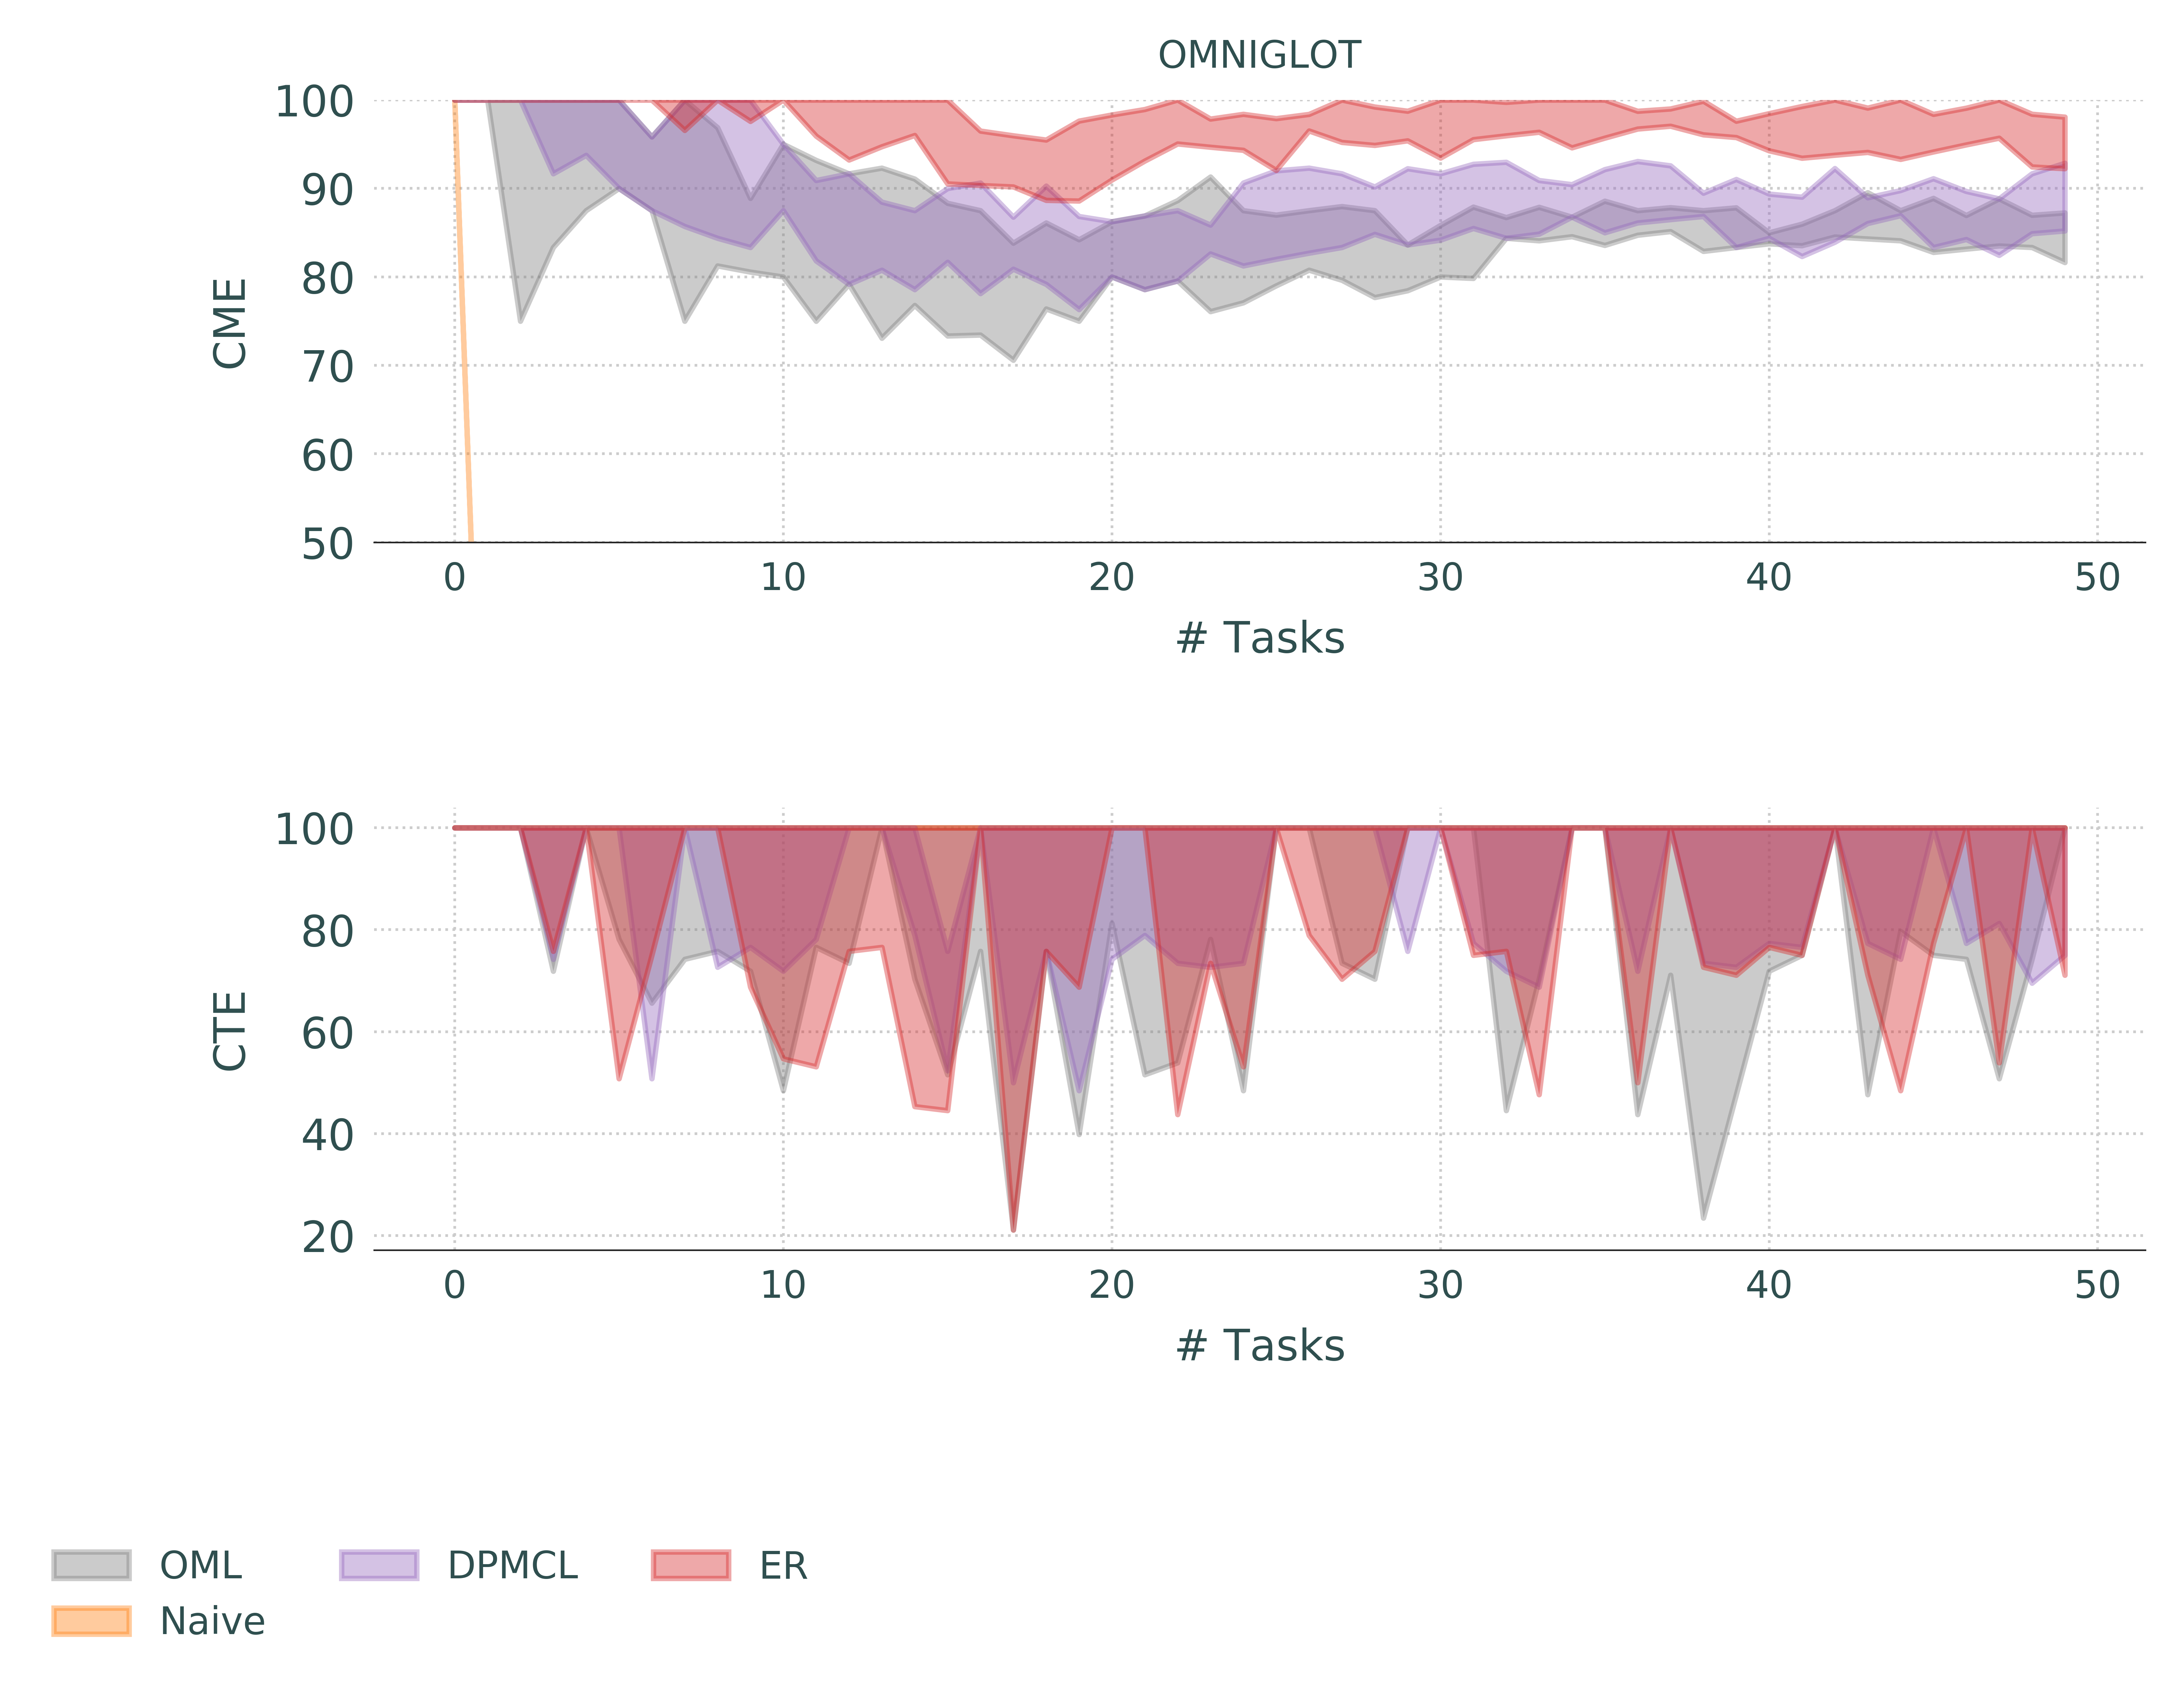

In [128]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7
def cm2inch(value):
    return value/2.54
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (cm2inch(15),cm2inch(10)),
          'axes.labelsize': med,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': small, 
          'font.family': "sans-serif",
          'font.sans-serif': "Myriad Hebrew",
            'text.color' : COLOR,
            'axes.labelcolor' : COLOR,
            'axes.linewidth' : 0.3,
            'xtick.color' : COLOR,
            'ytick.color' : COLOR}
plt.rcParams.update(params)
plt.rc('text', usetex = False)
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',\
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'
savename = 'Incre_Sine.eps'
# create plots with numpy array
fig,a =  plt.subplots(2,1, dpi = 1200, gridspec_kw = {'wspace':0.6, 'hspace':0.6})


t = np.arange(50)

Data      = [OML_CME, Naive_CME, DPMCL_CME, ER_CME]
labels    = ['OML',    'Naive', 'DPMCL',         'ER']
color_idx = [7,        1,        4,        3]


# t = np.arange(10)
for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =   np.min(element, axis = 0)[0:50]
    yerr =   np.max(element, axis = 0)[0:50]
    a[0].fill_between(t, (mean), (yerr), alpha=0.4, label = labels[i], color = color[color_idx[i]])


a[0].set_xlabel('# Tasks')

a[0].set_ylabel('CME')
########## CTE
# Some Plot oriented settings 
a[0].spines["top"].set_visible(False)    
a[0].spines["bottom"].set_visible(True)    
a[0].spines["right"].set_visible(False)    
a[0].spines["left"].set_visible(False)  
a[0].grid(linestyle=':', linewidth=0.5)
a[0].get_xaxis().tick_bottom()    
a[0].get_yaxis().tick_left()  
# a.set_yscale('log')
a[0].set_ylim([50,100])
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )



t = np.arange(50)

Data      = [OML_CTE, Naive_CTE, DPMCL_CTE, ER_CTE]
labels    = ['OML',    'Naive', 'DPMCL',         'ER']
color_idx = [7,        1,        4,        3]


# t = np.arange(10)
for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =   np.min(element, axis = 0)[0:50]
    yerr =   np.max(element, axis = 0)[0:50]
    a[1].fill_between(t, (mean), (yerr), alpha=0.4, label = labels[i], color = color[color_idx[i]])


a[1].set_xlabel('# Tasks')

a[1].set_ylabel('CTE')
########## CTE
# Some Plot oriented settings 
a[1].spines["top"].set_visible(False)    
a[1].spines["bottom"].set_visible(True)    
a[1].spines["right"].set_visible(False)    
a[1].spines["left"].set_visible(False)  
a[1].grid(linestyle=':', linewidth=0.5)
a[1].get_xaxis().tick_bottom()    
a[1].get_yaxis().tick_left()  
# a.set_yscale('log')
# a[0].set_ylim([75,100])
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )

a[0].set_title('OMNIGLOT')
#plt.savefig('Incre_Sine_CME.pdf', format = 'pdf', bbox_inches='tight', pad_inches = 0, dpi=300) 
plt.show()

In [127]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7
def cm2inch(value):
    return value/2.54
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (cm2inch(15),cm2inch(15)),
          'axes.labelsize': med,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': small, 
          'font.family': "sans-serif",
          'font.sans-serif': "Myriad Hebrew",
            'text.color' : COLOR,
            'axes.labelcolor' : COLOR,
            'axes.linewidth' : 0.3,
            'xtick.color' : COLOR,
            'ytick.color' : COLOR}
plt.rcParams.update(params)
plt.rc('text', usetex = False)
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',\
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'
savename = 'Incre_Sine.eps'
# create plots with numpy array
fig,a =  plt.subplots(1,1, dpi = 1200, gridspec_kw = {'wspace':0.6, 'hspace':0.6})


t = np.arange(50)

Data      = [OML_CME, Naive_CME, DPMCL_CME, ER_CME]
labels    = ['OML',    'Naive', 'DPMCL',         'ER']
color_idx = [8,        1,        4,        3]


# t = np.arange(10)
for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =  np.min(element, axis = 0)[0:50]
    yerr =   np.max(element, axis = 0)[0:50]
    a.fill_between(t, (mean), (yerr), alpha=0.4, label = labels[i], color = color[color_idx[i]])


a.set_xlabel('# Tasks')

a.set_ylabel('CME')
########## CTE
# Some Plot oriented settings 
a.spines["top"].set_visible(False)    
a.spines["bottom"].set_visible(True)    
a.spines["right"].set_visible(False)    
a.spines["left"].set_visible(False)  
a.grid(linestyle=':', linewidth=0.5)
a.get_xaxis().tick_bottom()    
a.get_yaxis().tick_left()  
# a.set_yscale('log')
a.set_ylim([75,100])
a.set_xlim([40,50])
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )
#plt.savefig('Incre_Sine_CME.pdf', format = 'pdf', bbox_inches='tight', pad_inches = 0, dpi=300) 
plt.show()

(5, 50)
(5, 50)
(5, 50)
(5, 50)


(5, 50)
(5, 50)
(5, 50)
(5, 50)


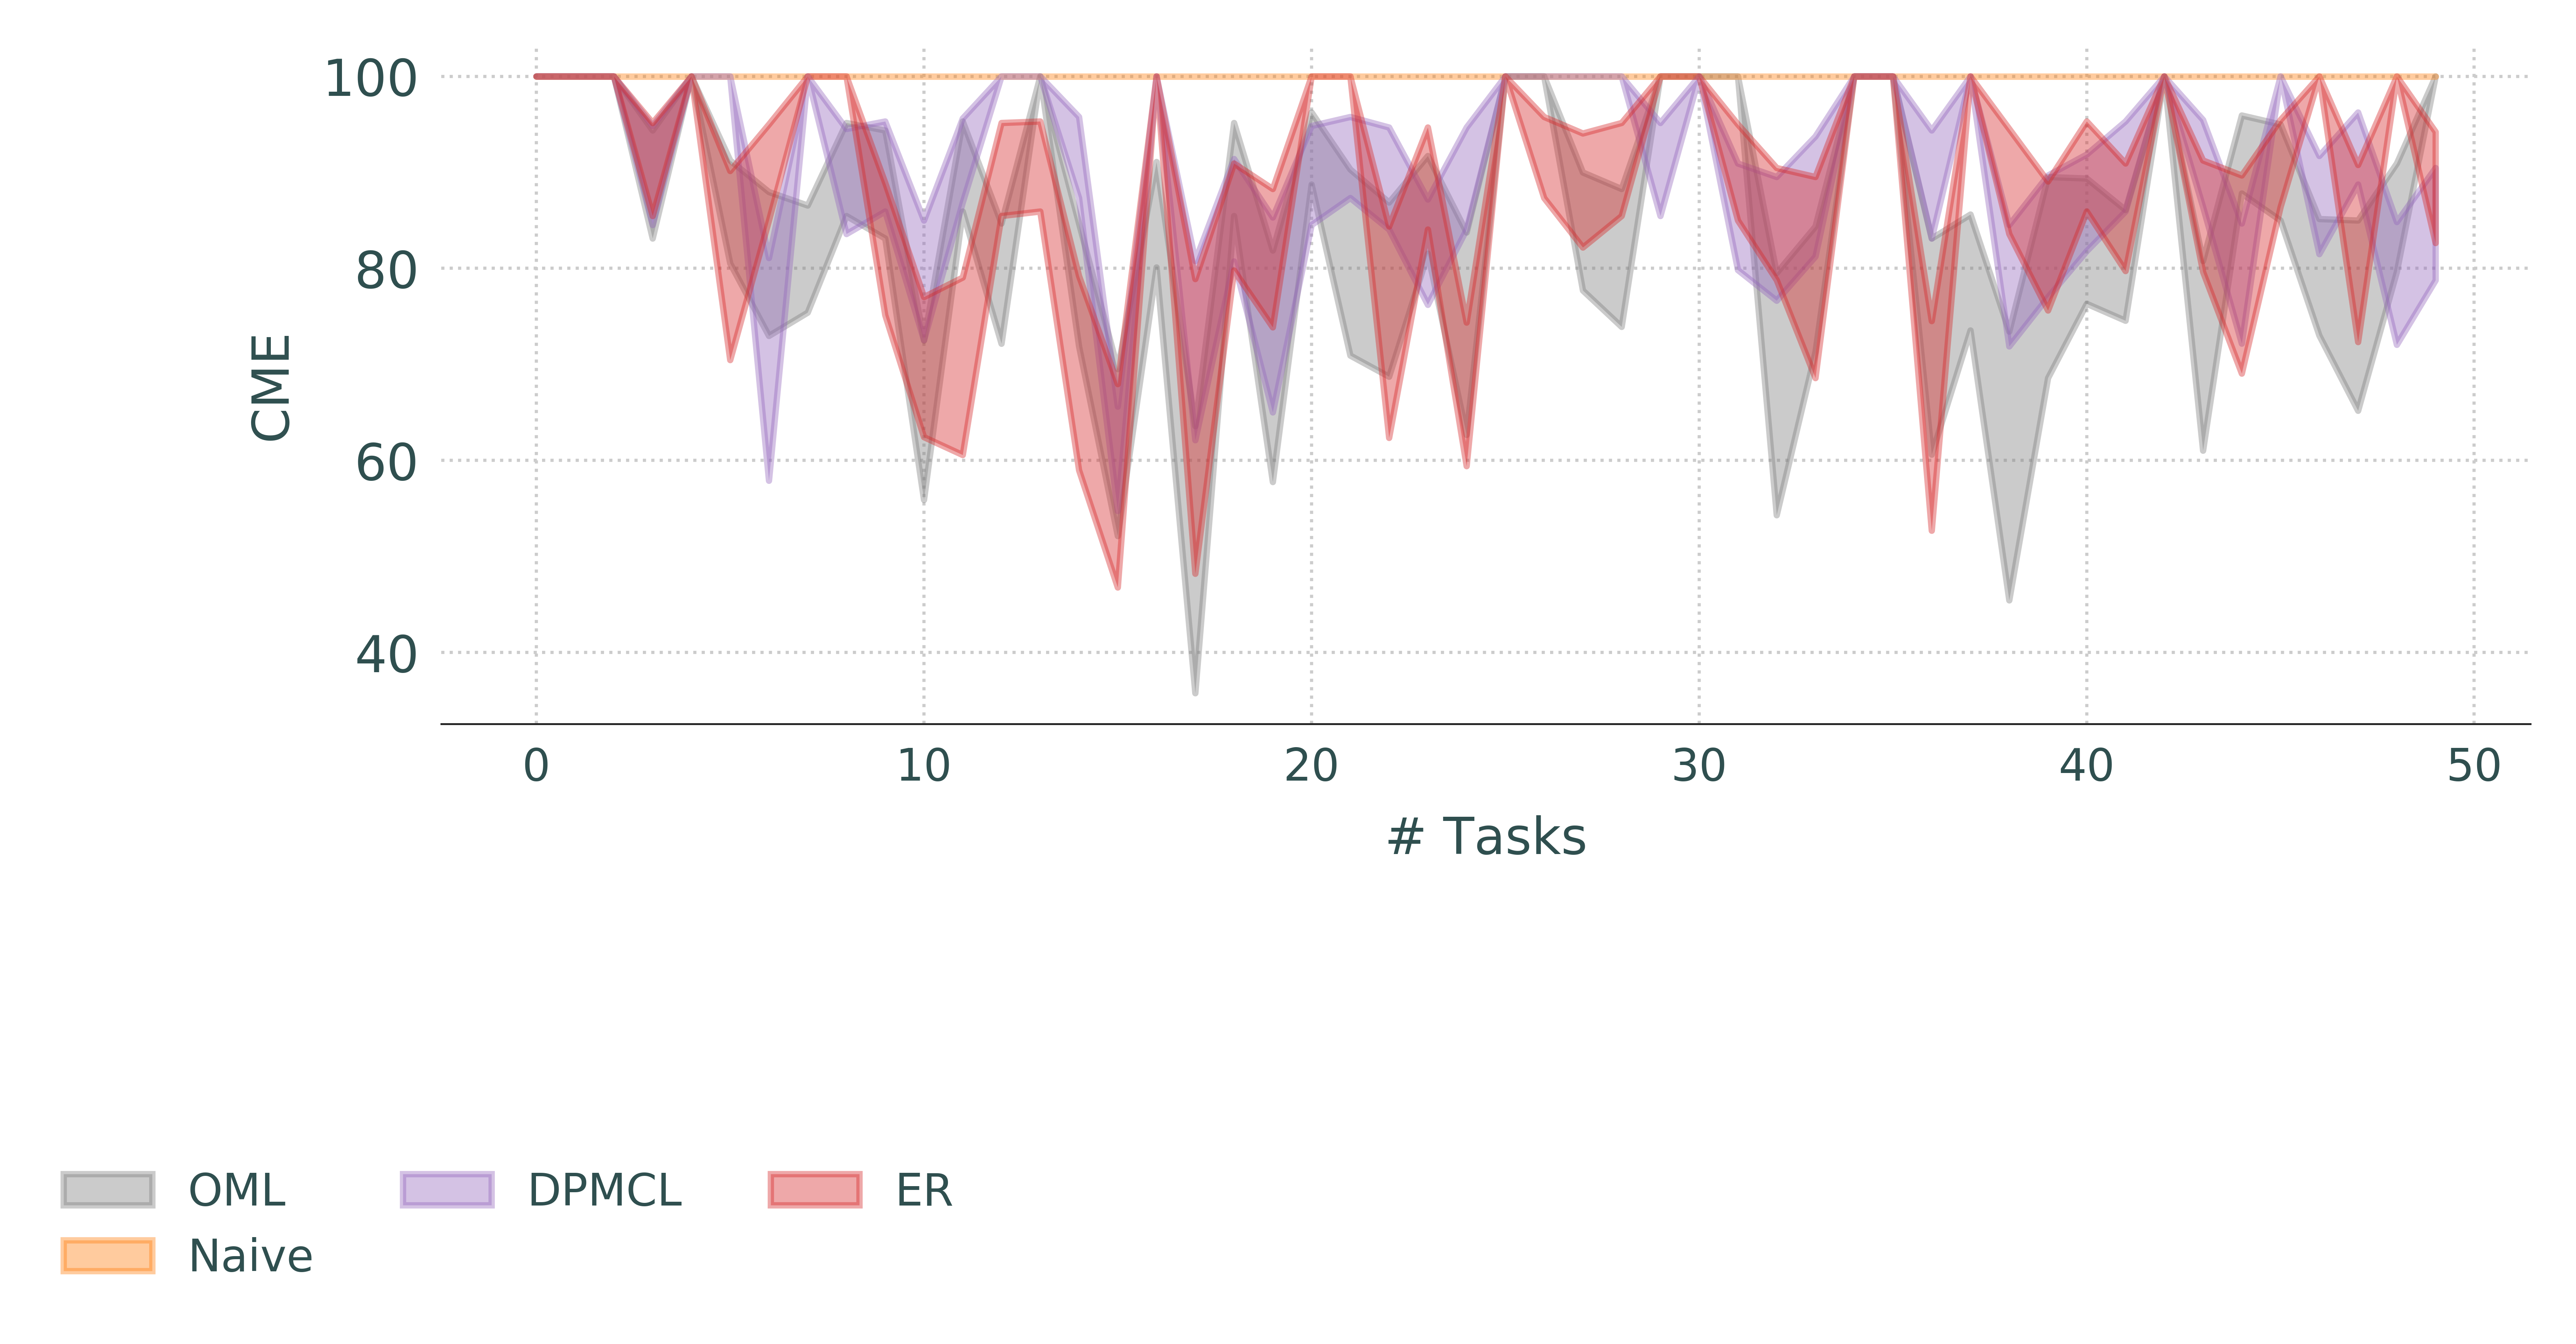

In [56]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7
def cm2inch(value):
    return value/2.54
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (cm2inch(15),cm2inch(5)),
          'axes.labelsize': med,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': small, 
          'font.family': "sans-serif",
          'font.sans-serif': "Myriad Hebrew",
            'text.color' : COLOR,
            'axes.labelcolor' : COLOR,
            'axes.linewidth' : 0.3,
            'xtick.color' : COLOR,
            'ytick.color' : COLOR}
plt.rcParams.update(params)
plt.rc('text', usetex = False)
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',\
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'
savename = 'Incre_Sine.eps'
# create plots with numpy array
fig,a =  plt.subplots(1,1, dpi = 1200, gridspec_kw = {'wspace':0.6, 'hspace':0.6})


t = np.arange(50)

Data      = [OML_CTE, Naive_CTE, DPMCL_CTE, ER_CTE]
labels    = ['OML',    'Naive', 'DPMCL',         'ER']
color_idx = [7,        1,        4,        3]


# t = np.arange(10)
for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =  np.mean(element, axis = 0)[0:50]
    yerr =   np.std(element, axis = 0)[0:50]
    a.fill_between(t, (mean-yerr), (mean), alpha=0.4, label = labels[i], color = color[color_idx[i]])


a.set_xlabel('# Tasks')

a.set_ylabel('CME')
########## CTE
# Some Plot oriented settings 
a.spines["top"].set_visible(False)    
a.spines["bottom"].set_visible(True)    
a.spines["right"].set_visible(False)    
a.spines["left"].set_visible(False)  
a.grid(linestyle=':', linewidth=0.5)
a.get_xaxis().tick_bottom()    
a.get_yaxis().tick_left()  
# a.set_yscale('log')
# a.set_ylim([75,100])
# a.set_xlim([45,50])
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )
#plt.savefig('Incre_Sine_CME.pdf', format = 'pdf', bbox_inches='tight', pad_inches = 0, dpi=300) 
plt.show()

# "Omniglot

In [76]:
t = np.arange(0,50)
save_dir = 'omni/'

Naive_CME_sine =pd.read_csv(save_dir+'Naive_CME.csv', delimiter=',', header=None ).values
OML_CME_sine =pd.read_csv(save_dir+'OML_CME.csv', delimiter=',', header=None ).values
ER_CME_sine =pd.read_csv(save_dir +'ER_CTE.csv', delimiter=',', header=None ).values
# OML_CME_sine_50 =pd.read_csv('sine/OML_50_CME.csv', delimiter=',', header=None ).values
# OML_CME_sine_150 =pd.read_csv('sine/OML_150_CME.csv', delimiter=',', header=None ).values
# OML_CME_sine_100 =pd.read_csv('sine/OML_100_CME.csv', delimiter=',', header=None ).values
DPMCL_CME_sine =pd.read_csv(save_dir +'DPMCL_CTE.csv', delimiter=',', header=None ).values
CML_CME_omni  = pd.read_csv('../CML/Results_paper/CME_CML_OMNI.csv', delimiter=',', header=None ).values
ANML_CME_omni = pd.read_csv('../CML/Results_paper/CME_CML_OMNI.csv', delimiter=',', header=None ).values*np.exp(0.001*t)

print(Naive_CME_sine.shape, OML_CME_sine.shape, DPMCL_CME_sine.shape)

(2, 10) (2, 10) (2, 10)


(5, 10)
(5, 10)
(5, 10)
(5, 10)


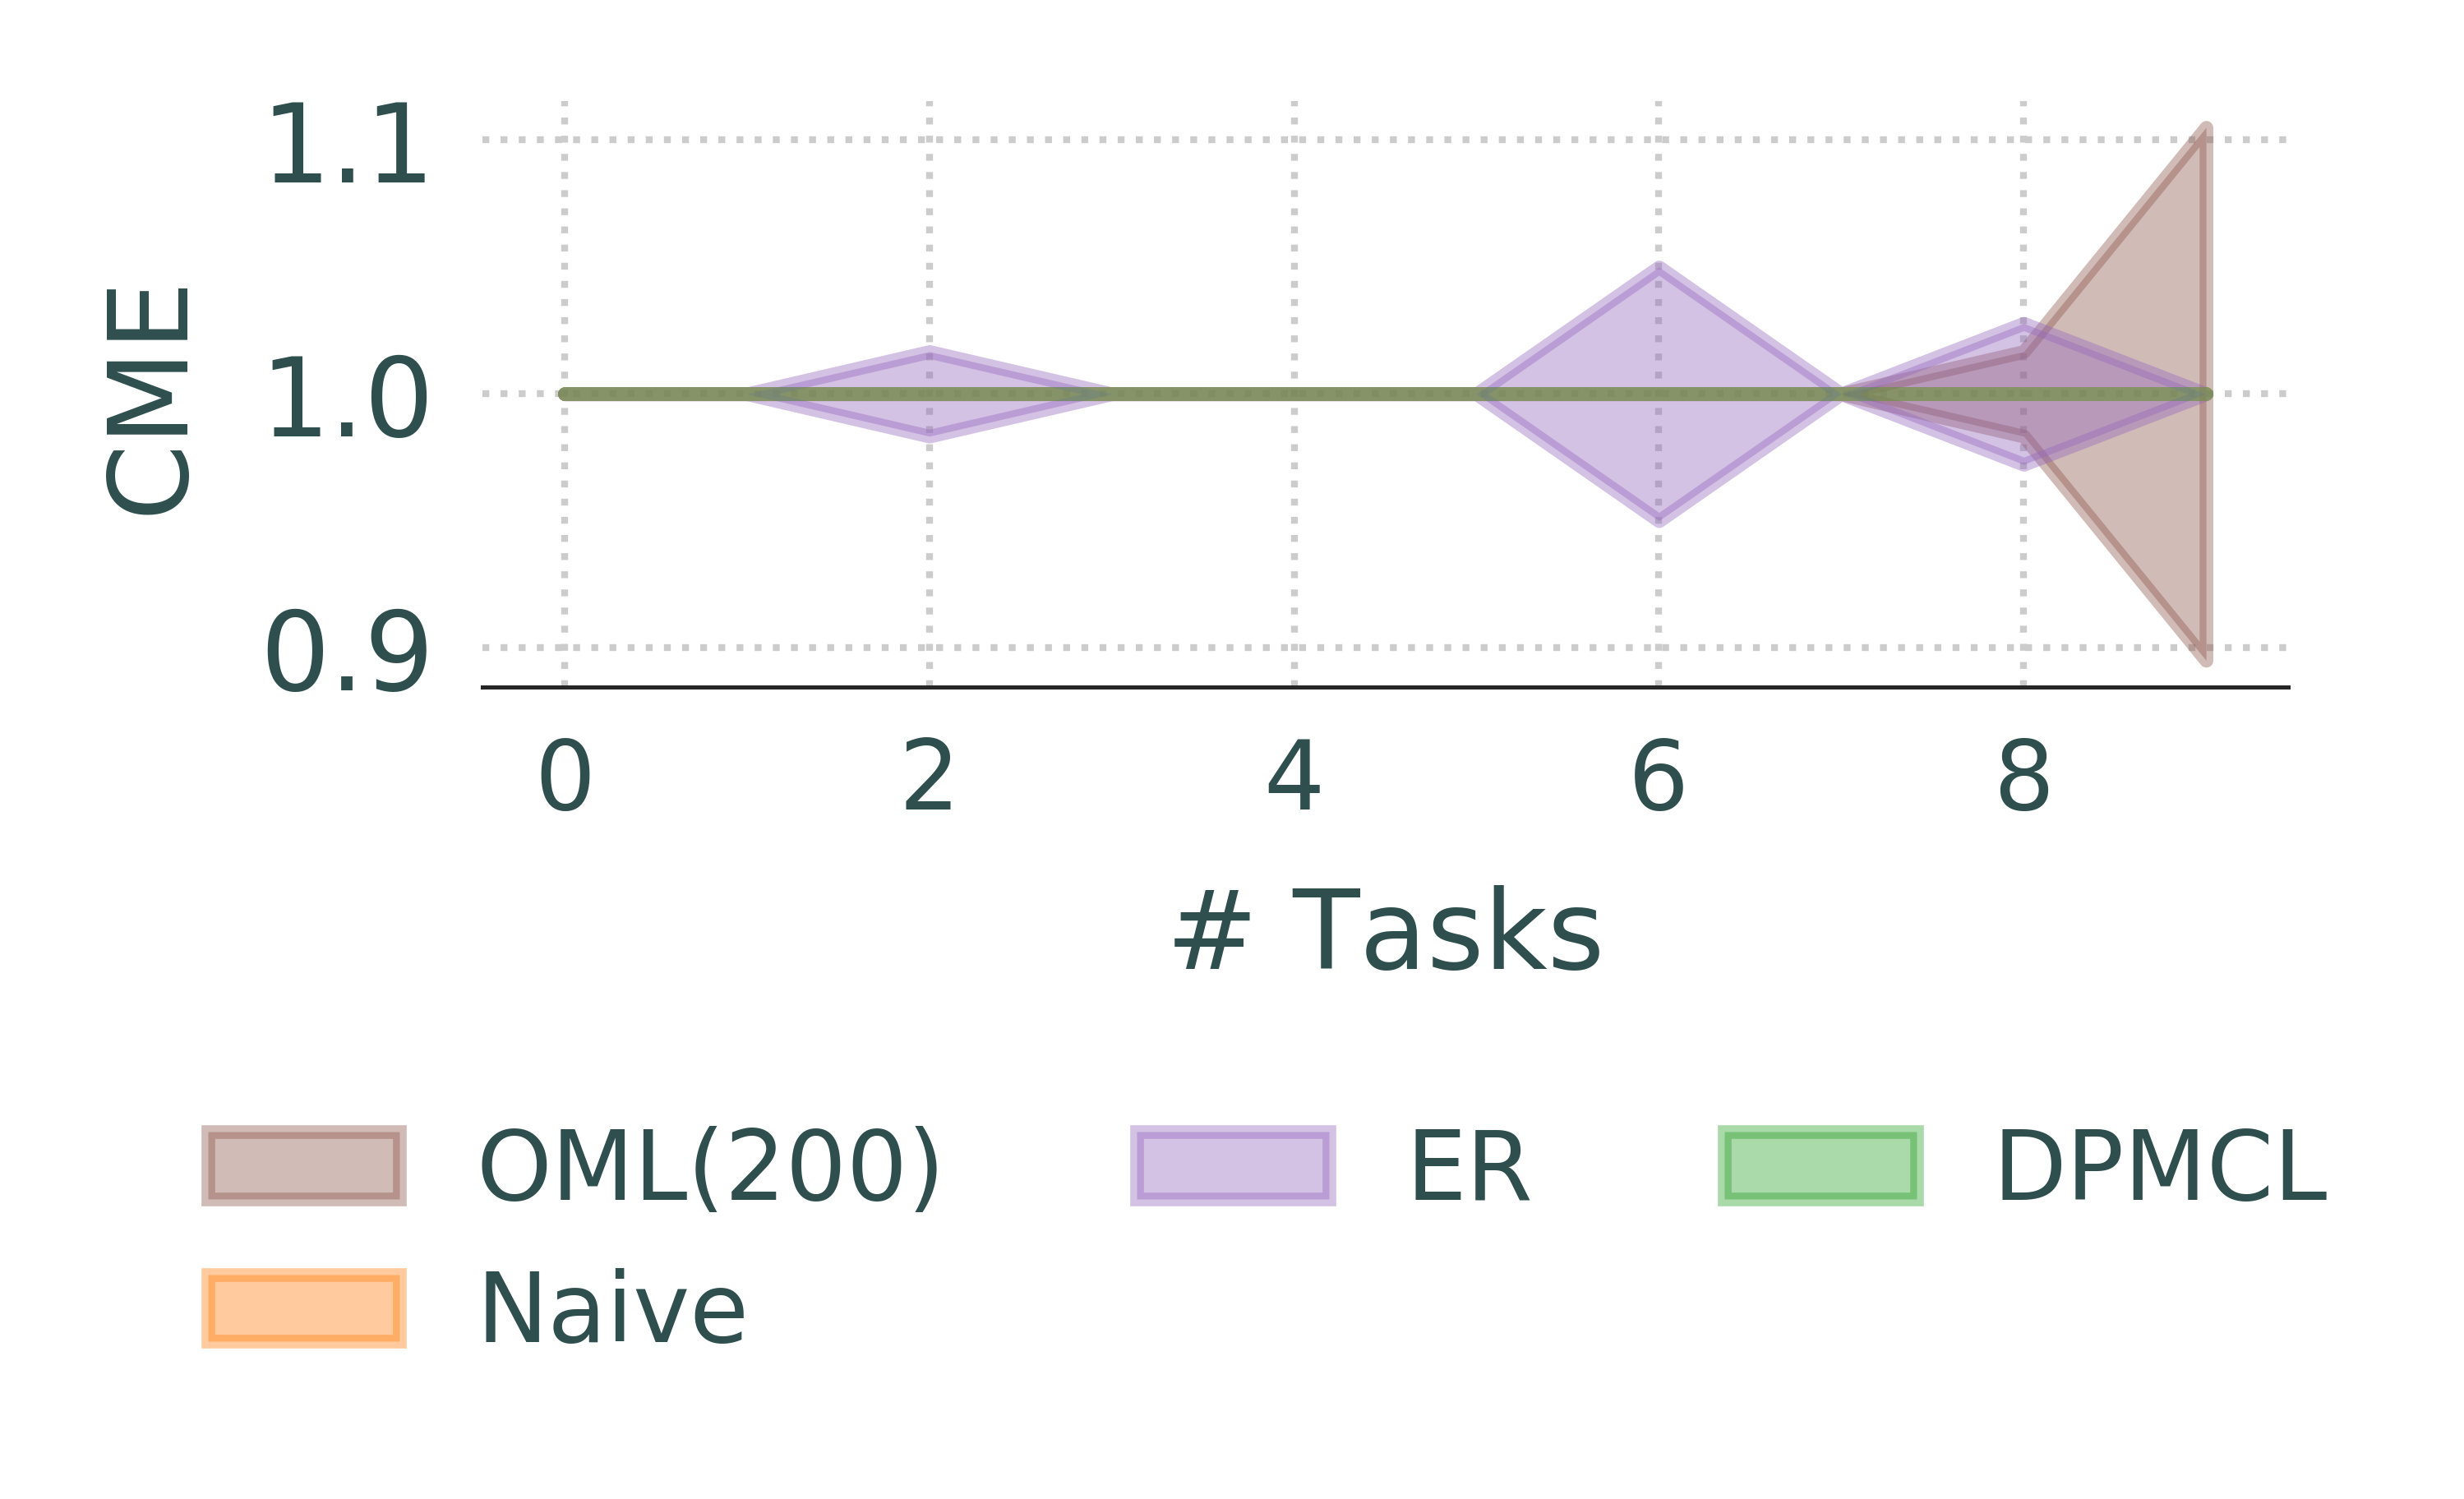

In [69]:

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.font_manager as font_manager
large = 24; med = 8; small = 7
def cm2inch(value):
    return value/2.54
plt.style.use('seaborn-white')
COLOR = 'darkslategray'
params = {'axes.titlesize': small,
          'legend.fontsize': small,
          'figure.figsize': (cm2inch(6),cm2inch(2)),
          'axes.labelsize': med,
          'axes.titlesize': small,
          'xtick.labelsize': small,
          'ytick.labelsize': med,
          'figure.titlesize': small, 
          'font.family': "sans-serif",
          'font.sans-serif': "Myriad Hebrew",
            'text.color' : COLOR,
            'axes.labelcolor' : COLOR,
            'axes.linewidth' : 0.3,
            'xtick.color' : COLOR,
            'ytick.color' : COLOR}
plt.rcParams.update(params)
plt.rc('text', usetex = False)
color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',\
        '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rcParams['mathtext.fontset'] = 'cm'
savename = 'Incre_Sine.eps'
# create plots with numpy array
fig,a =  plt.subplots(1,1, dpi = 1200, gridspec_kw = {'wspace':0.6, 'hspace':0.6})


t = np.arange(10)
Data      = [OML_CME_sine, Naive_CME_sine, ER_CME_sine, DPMCL_CME_sine]
labels    = ['OML(200)', 'Naive', 'ER', 'DPMCL']
color_idx = [5, 1, 4, 2]


for i, element in enumerate(Data):
    print(element.shape)
    # The inal Plots with CME
    mean =  np.mean(element, axis = 0)[0:10]
    yerr =   np.std(element, axis = 0)[0:10]
    a.fill_between(t, (mean + yerr), (mean), alpha=0.4, label = labels[i], color = color[color_idx[i]])

a.set_xlabel('# Tasks')
a.set_ylabel('CME')
########## CTE
# Some Plot oriented settings 
a.spines["top"].set_visible(False)    
a.spines["bottom"].set_visible(True)    
a.spines["right"].set_visible(False)    
a.spines["left"].set_visible(False)  
a.grid(linestyle=':', linewidth=0.5)
a.get_xaxis().tick_bottom()    
a.get_yaxis().tick_left()  
# za.set_yscale('log')
plt.legend(bbox_to_anchor=(-0.2, -0.7, 0.3, 0.1), loc = 'upper left',ncol=3 )
#plt.savefig('Incre_Sine_CME.pdf', format = 'pdf', bbox_inches='tight', pad_inches = 0, dpi=300) 
plt.show()